<a href="https://colab.research.google.com/github/GimenesPaula/GimenesPaula/blob/main/Celu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#Dominant Color
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from collections import Counter
import pprint

In [57]:
#Image Difference with OpenCV and Python
# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils

In [78]:
#antes
from google.colab import files
imagem = files.upload()
filename2 = next(iter(imagem))

Saving 241AC3-11D antes.jpg to 241AC3-11D antes.jpg


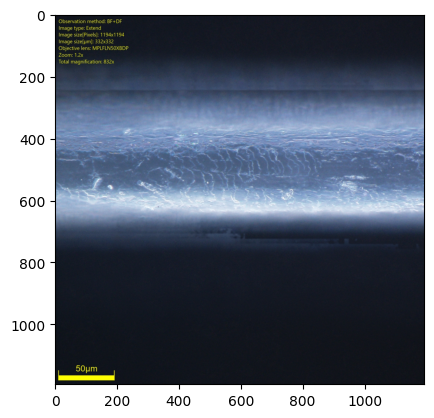

In [79]:
antes = cv2.imread(filename2)
img = cv2.cvtColor(antes, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [60]:
# Carrega Depois
from google.colab import files
imagem = files.upload()
filename = next(iter(imagem))

Saving 241AC3-05 depois.jpg to 241AC3-05 depois (1).jpg


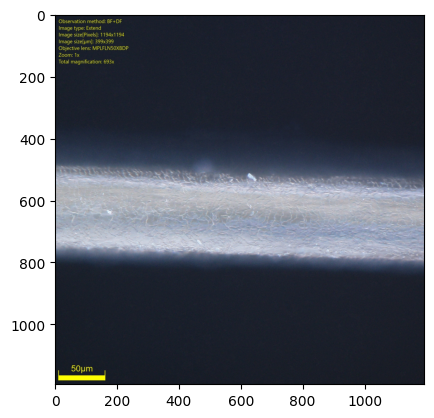

In [61]:
depois = cv2.imread(filename)
img2 = cv2.cvtColor(depois, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

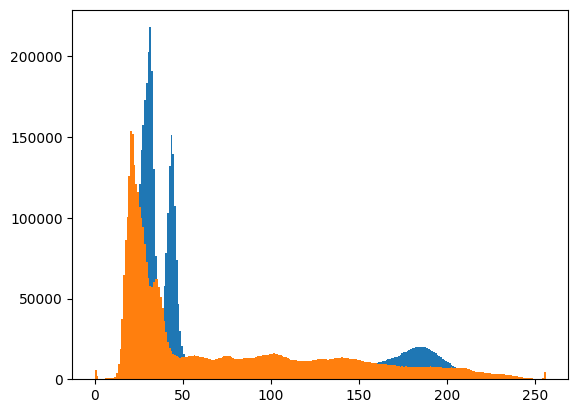

In [80]:
plt.hist(depois.ravel(),bins = 256, range = [0,256]) #azul
plt.hist(antes.ravel(),bins = 256, range = [0,256])  #Laranja
plt.show()

In [81]:
#compara HSV
img_hsv_antes = cv2.cvtColor(antes, cv2.COLOR_BGR2HSV)
img_hsv_depois = cv2.cvtColor(depois, cv2.COLOR_BGR2HSV)
hsv_list = ['Hue','Saturation','Value']
(score, diff) = compare_ssim(img_hsv_depois[:,:,2], img_hsv_antes[:,:,2], full=True)
diff = (diff * 255).astype("uint8")
print("SSIM V: {}".format(score))
(score, diff) = compare_ssim(img_hsv_depois[:,:,1], img_hsv_antes[:,:,1], full=True)
diff = (diff * 255).astype("uint8")
print("SSIM S: {}".format(score))
(score, diff) = compare_ssim(img_hsv_depois[:,:,0], img_hsv_antes[:,:,0], full=True)
diff = (diff * 255).astype("uint8")
print("SSIM H: {}".format(score))

SSIM V: 0.6270003821430363
SSIM S: 0.2658212055513397
SSIM H: 0.7665581530649922


In [82]:
#Comparar Antes e depois
gray_image_antes = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image_depois = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [83]:
(score, diff) = compare_ssim(gray_image_depois, gray_image_antes, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.6400276030658715


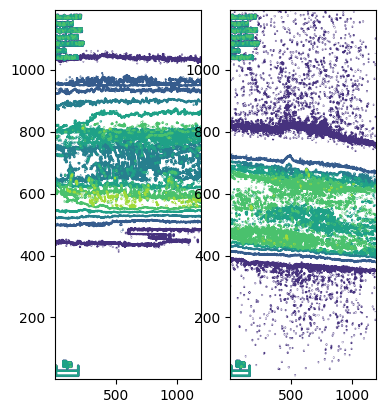

In [84]:
plt.subplot(131),plt.contour(gray_image_antes, origin = "image")
plt.subplot(132),plt.contour(gray_image_depois, origin = "image")
plt.show()

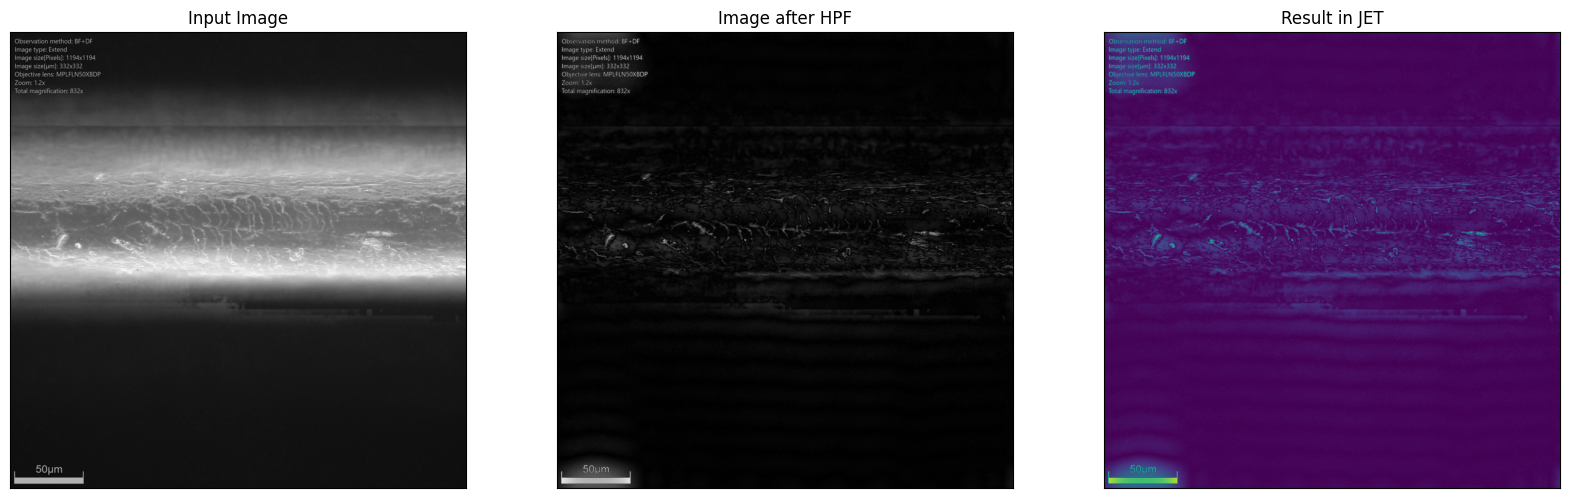

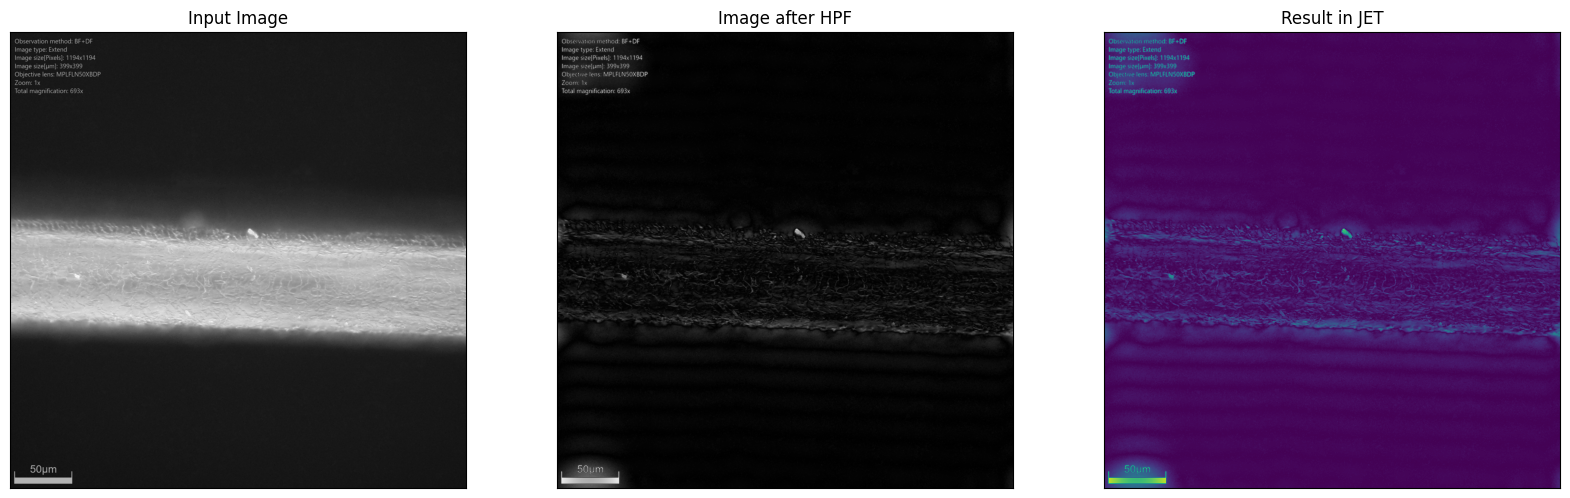

In [94]:
#remove componentes de baixa frequencia
def componente (img):
  # Blur the grayscale image by a Guassian filter with kernel size of 10
  imBlur = cv2.blur(img,(2,2))
  # Transform the image to frequency domain
  f = np.fft.fft2(imBlur)
  # Bring the zero-frequency component to the center
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 30*np.log(np.abs(fshift))

  #This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges
  rows, cols = imBlur.shape
  crow,ccol = round(rows/2) , round(cols/2)
  # remove low frequencies with a rectangle size of 10
  fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.abs(img_back)

  plt.figure(figsize=([20, 20]))
  plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
  plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
  plt.subplot(133),plt.imshow(img_back)
  plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
  plt.show()
componente(gray_image_antes)
componente(gray_image_depois)

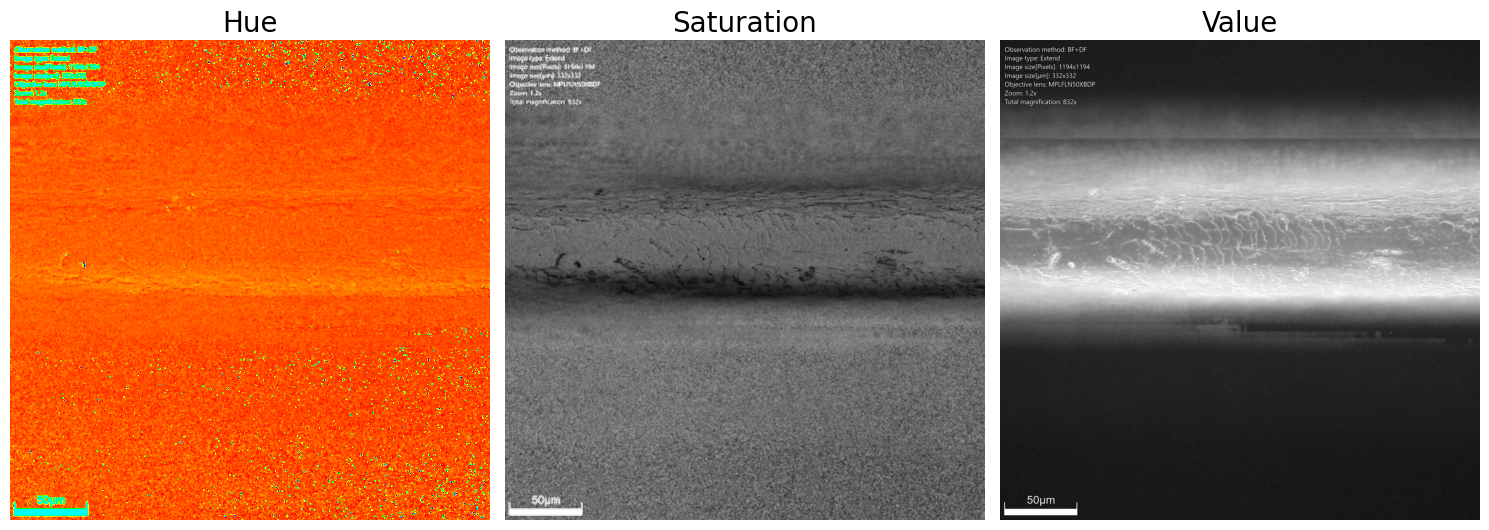

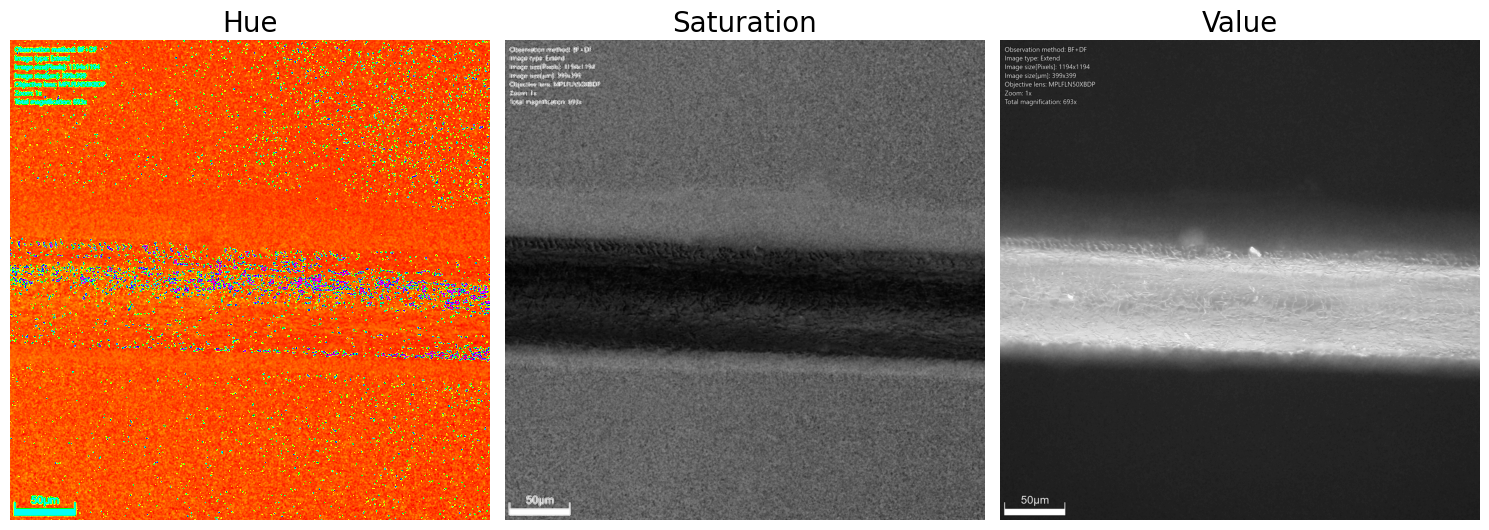

In [87]:
def display_as_hsv(img):

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hsv_list = ['Hue','Saturation','Value']
    fig, ax = plt.subplots(1, 3, figsize=(15,7), sharey = True) ##the figure has 1 row, 3 columns.

    ax[0].imshow(img_hsv[:,:,0], cmap = 'hsv')
    ax[0].set_title(hsv_list[0], fontsize = 20)
    ax[0].axis('off')


    ax[1].imshow(img_hsv[:,:,1], cmap = 'gray')
    ax[1].set_title(hsv_list[1], fontsize = 20)
    ax[1].axis('off')


    ax[2].imshow(img_hsv[:,:,2], cmap = 'gray')
    ax[2].set_title(hsv_list[2], fontsize = 20)
    ax[2].axis('off')

    fig.tight_layout()

display_as_hsv(img)
display_as_hsv(img2)

In [88]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)

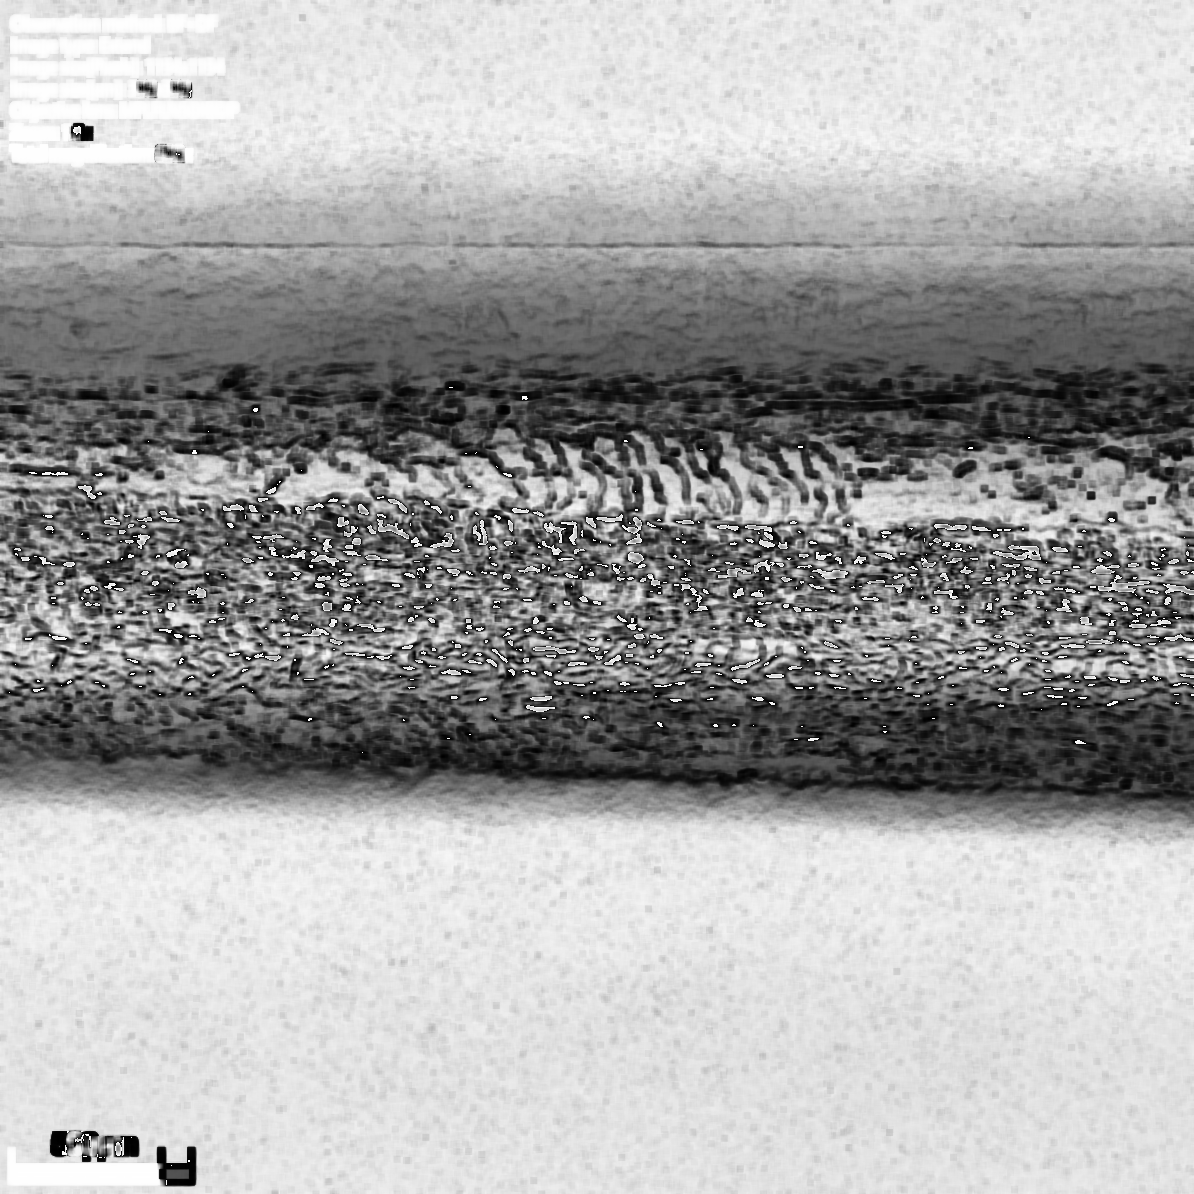

In [89]:
cv2_imshow(diff)